In [1]:
import xml.etree.ElementTree as ET
# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Execution times analysis

## Parsing and aggregation
We first parse the execution times for Micro and TPC-H queries in the XML report.

In [2]:
tree = ET.parse('TEST-ch.epfl.dias.cs422.QueryTest.xml')
print(tree)

In [3]:
root = tree.getroot()[1:-2]

In [4]:
for child in root[:10]:
    print(child.tag, child.attrib)

testcase {'classname': 'ch.epfl.dias.cs422.QueryTest', 'name': 'tests():1', 'time': '2.272'}
testcase {'classname': 'ch.epfl.dias.cs422.QueryTest', 'name': 'tests():1', 'time': '0.066'}
testcase {'classname': 'ch.epfl.dias.cs422.QueryTest', 'name': 'tests():2', 'time': '0.035'}
testcase {'classname': 'ch.epfl.dias.cs422.QueryTest', 'name': 'tests():3', 'time': '0.034'}
testcase {'classname': 'ch.epfl.dias.cs422.QueryTest', 'name': 'tests():4', 'time': '0.159'}
testcase {'classname': 'ch.epfl.dias.cs422.QueryTest', 'name': 'tests():5', 'time': '0.073'}
testcase {'classname': 'ch.epfl.dias.cs422.QueryTest', 'name': 'tests():6', 'time': '0.025'}
testcase {'classname': 'ch.epfl.dias.cs422.QueryTest', 'name': 'tests():7', 'time': '0.017'}
testcase {'classname': 'ch.epfl.dias.cs422.QueryTest', 'name': 'tests():8', 'time': '0.016'}
testcase {'classname': 'ch.epfl.dias.cs422.QueryTest', 'name': 'tests():9', 'time': '0.02'}


In [5]:
tests = ["volcano (row store)", "operator-at-a-time (row store)","block-at-a-time (row store)", 
"late-operator-at-a-time (row store)","volcano (column store)",
"operator-at-a-time (column store)",
"block-at-a-time (column store)",
"late-operator-at-a-time (column store)", 
"volcano (pax store)", "operator-at-a-time (pax store)",
"block-at-a-time (pax store)",
"late-operator-at-a-time (pax store)" ]

In [6]:
groups = zip(*[iter(root)]*3)

In [7]:
data = {}
for idx,test in enumerate(tests):
    data[test] = root[45*idx: (idx + 1)*45]

We associate the list of tests with the correct execution times.

In [8]:
print(data[tests[0]][0].attrib['time'])
bars = {}
limit = 12
count = 0
for k,v in data.items():
    if count < limit:
        tmp = []
        for stat in v:
            tmp.append(float(stat.attrib['time']))
        bars[k] = tmp
        count += 1


2.272


In [9]:
block = "block-at-a-time"
volcano = "volcano"
operator = "operator-at-a-time"
late ="late"
models = [volcano, operator, block, late]


We group the execution times by execution models and type of queries

In [10]:
def byModel(bars, start=0, end=45):

    groupedByModel = {}
    for m in models:
        groupedByModel[m] = {}
    for name, times in bars.items():
        for model in models:
            if name.startswith(model):
                groupedByModel[model][name] = times[start:end]
    return groupedByModel

In [11]:
tcph = byModel(bars, 35, 45)
micro = byModel(bars,1,35)
tcph

{'volcano': {'volcano (row store)': [0.144,
   0.406,
   0.269,
   0.175,
   0.043,
   0.102,
   0.151,
   0.113,
   0.1,
   0.1],
  'volcano (column store)': [0.062,
   0.124,
   0.15,
   0.143,
   0.036,
   0.07,
   0.102,
   0.077,
   0.087,
   0.074],
  'volcano (pax store)': [0.068,
   0.119,
   0.165,
   0.138,
   0.038,
   0.066,
   0.101,
   0.084,
   0.079,
   0.08]},
 'operator-at-a-time': {'operator-at-a-time (row store)': [0.158,
   0.163,
   0.242,
   0.227,
   0.082,
   0.201,
   0.192,
   0.147,
   0.178,
   0.157],
  'operator-at-a-time (column store)': [0.156,
   0.113,
   0.184,
   0.231,
   0.059,
   0.175,
   0.136,
   0.111,
   0.092,
   0.108],
  'operator-at-a-time (pax store)': [0.23,
   0.119,
   0.234,
   0.275,
   0.082,
   0.18,
   0.192,
   0.15,
   0.15,
   0.15]},
 'block-at-a-time': {'block-at-a-time (row store)': [0.069,
   0.15,
   0.179,
   0.113,
   0.032,
   0.076,
   0.076,
   0.063,
   0.069,
   0.068],
  'block-at-a-time (column store)': [0.06,
 

# Visualization
We plot bar charts of execution times for all execution models under different data layout 

In [22]:
def plot(bars, n, title):
    ind = np.arange(n)    # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence
    barWidth = 0.25
    #p1 = plt.bar(ind, menMeans, width, yerr=menStd)
    #p2 = plt.bar(ind, womenMeans, width,
                 #bottom=menMeans, yerr=womenStd)
    ps = []
    r=ind
    plt.figure(figsize=(10,5))
    for name, times in bars.items():
        ps.append(plt.bar(r, times, barWidth))
        r = [x + barWidth for x in r]
    plt.ylabel('Execution Time (s)')
    plt.title(title)
    #plt.xticks(ind, tuple([str(i) for i in range(n)]))
    plt.xticks([y + barWidth for y in range(n)], tuple([str(i) for i in range(n)]))
    #plt.yticks(np.linspace(0, 0.1 , 10))
    plt.legend(tuple(ps), tuple(bars.keys()))
    plt.show()

In [23]:
models

['volcano', 'operator-at-a-time', 'block-at-a-time', 'late']

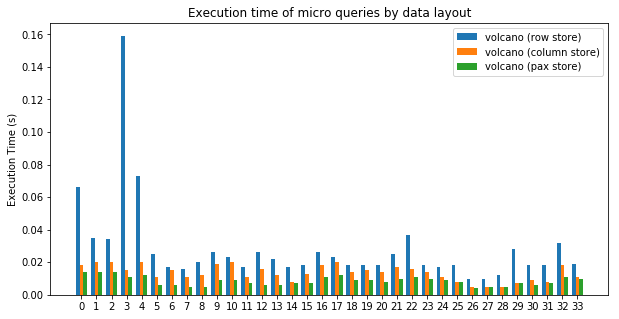

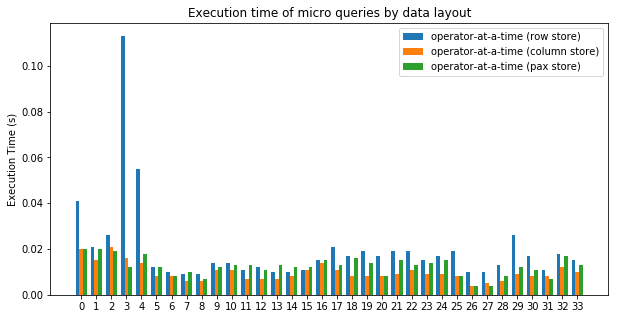

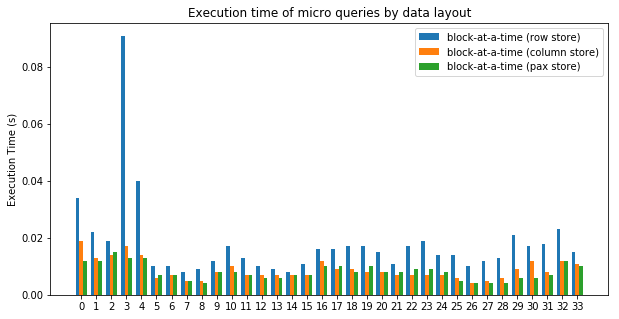

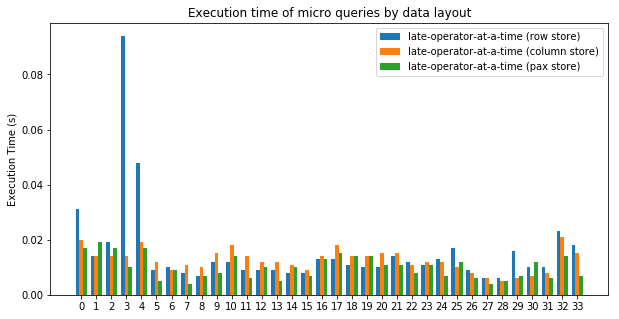

In [24]:
for model in models:
    plot(micro[model], 34, "Execution time of micro queries by data layout")

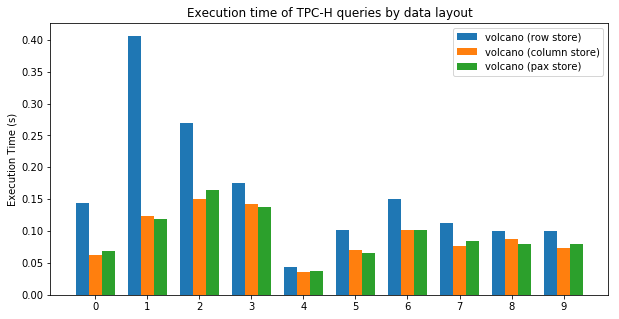

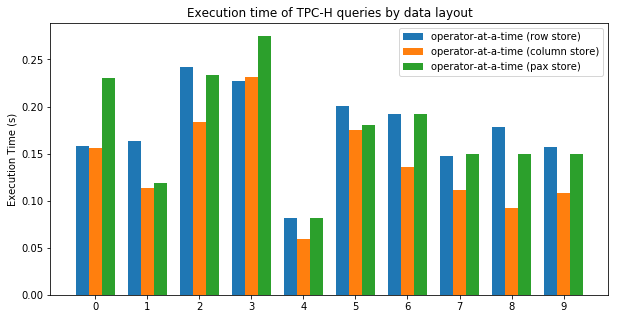

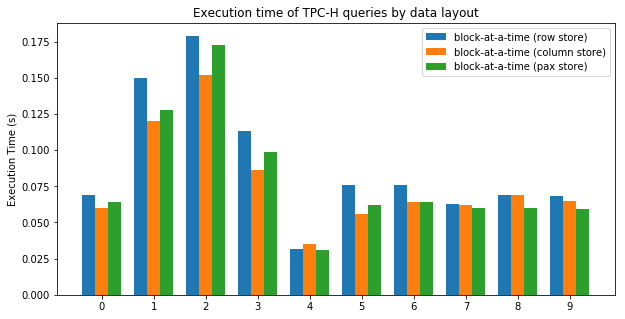

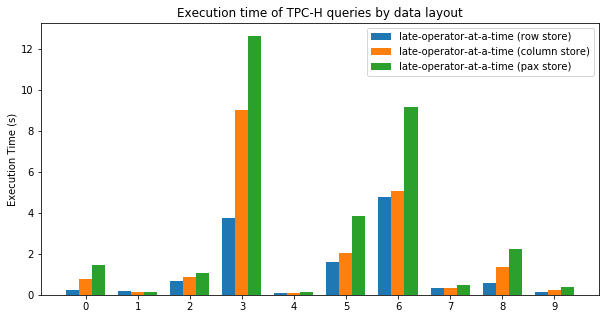

In [29]:
for model in models:
    plot(tcph[model], 10, "Execution time of TPC-H queries by data layout")

We select the best data layout in each execution model and compare the execution times

In [30]:
def bestLayouts(results, qtype):
    bests = {}

    for model, layouts in results.items():
        sum = float('inf')
        #print(layouts)
        for layout, times in layouts.items():
            if np.sum(times) < sum:
                sum = np.sum(times)
                bests[model] ={layout: times, 'time': sum}
    cleanUp = {}
    if qtype == 'micro':
        qnames = ['Micro q' + str(i) for i in range(35)]
    elif qtype == 'tpch':
        qnames = ['TPC-H q01', 'TPC-H q02', 'TPC-H q03','TPC-H q04','TPC-H q05', 'TPC-H q06','TPC-H q07','TPC-H q09', 'TPC-H q17','TPC-H q18','TPC-H q19']
    print(bests)
    for name,v in bests.items():
        zippedTimes = zip(qnames, list(v.values())[0])
        model_layout = list(v.keys())[0]
        cleanUp[model_layout] = {}
        for (qname, time) in zippedTimes:
            cleanUp[model_layout][qname] = time
        cleanUp[model_layout]['Total time (s)'] = list(v.values())[1]
        cleanUp[model_layout]['Average time (s)'] = np.mean(list(v.values())[0] )
        cleanUp[model_layout]['Standard deviation (s)'] = np.std(list(v.values())[0] )


    return cleanUp
bestsMicro = bestLayouts(micro, 'micro')
bestsTPCH = bestLayouts(tcph, 'tpch')


{'volcano': {'volcano (pax store)': [0.014, 0.014, 0.014, 0.011, 0.012, 0.006, 0.006, 0.005, 0.005, 0.009, 0.009, 0.007, 0.006, 0.006, 0.007, 0.007, 0.011, 0.012, 0.009, 0.009, 0.008, 0.01, 0.011, 0.01, 0.009, 0.008, 0.004, 0.005, 0.005, 0.007, 0.006, 0.007, 0.011, 0.01], 'time': 0.29000000000000004}, 'operator-at-a-time': {'operator-at-a-time (column store)': [0.02, 0.015, 0.021, 0.016, 0.014, 0.008, 0.008, 0.006, 0.006, 0.011, 0.011, 0.007, 0.007, 0.007, 0.008, 0.011, 0.014, 0.011, 0.008, 0.008, 0.008, 0.009, 0.011, 0.009, 0.009, 0.008, 0.004, 0.005, 0.006, 0.009, 0.008, 0.008, 0.012, 0.01], 'time': 0.333}, 'block-at-a-time': {'block-at-a-time (pax store)': [0.012, 0.012, 0.015, 0.013, 0.013, 0.007, 0.007, 0.005, 0.004, 0.008, 0.008, 0.007, 0.006, 0.006, 0.007, 0.007, 0.01, 0.01, 0.008, 0.01, 0.008, 0.008, 0.009, 0.009, 0.008, 0.005, 0.004, 0.004, 0.004, 0.006, 0.006, 0.007, 0.012, 0.01], 'time': 0.275}, 'late': {'late-operator-at-a-time (pax store)': [0.017, 0.019, 0.017, 0.01, 0.01

In [31]:
pd.DataFrame(bestsMicro)

,volcano (pax store),operator-at-a-time (column store),block-at-a-time (pax store),late-operator-at-a-time (pax store)
Micro q0,0.014000,0.020000,0.012000,0.017000
Micro q1,0.014000,0.015000,0.012000,0.019000
Micro q2,0.014000,0.021000,0.015000,0.017000
Micro q3,0.011000,0.016000,0.013000,0.010000
Micro q4,0.012000,0.014000,0.013000,0.017000
Micro q5,0.006000,0.008000,0.007000,0.005000
Micro q6,0.006000,0.008000,0.007000,0.009000
Micro q7,0.005000,0.006000,0.005000,0.004000
Micro q8,0.005000,0.006000,0.004000,0.007000
Micro q9,0.009000,0.011000,0.008000,0.008000


In [32]:
pd.DataFrame(bestsTPCH)

,volcano (column store),operator-at-a-time (column store),block-at-a-time (column store),late-operator-at-a-time (row store)
TPC-H q01,0.062000,0.156000,0.060000,0.234000
TPC-H q02,0.124000,0.113000,0.120000,0.206000
TPC-H q03,0.150000,0.184000,0.152000,0.693000
TPC-H q04,0.143000,0.231000,0.086000,3.730000
TPC-H q05,0.036000,0.059000,0.035000,0.086000
TPC-H q06,0.070000,0.175000,0.056000,1.605000
TPC-H q07,0.102000,0.136000,0.064000,4.759000
TPC-H q09,0.077000,0.111000,0.062000,0.346000
TPC-H q17,0.087000,0.092000,0.069000,0.578000
TPC-H q18,0.074000,0.108000,0.065000,0.136000
